In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import cubehelix
cx = cubehelix.cmap(start=1, rot=2)

# from histpy import Histogram
# from mhealpy import HealpixMap, HealpixBase

# from cosipy import UnBinnedData, BinnedData



# import astropy.units as u
# from astropy.coordinates import SkyCoord, position_angle

In [2]:
# from cosipy.response import FullDetectorResponse
from astropy.coordinates import SkyCoord
import astropy.units as u
# from scoords import SpacecraftFrame
# from histpy import Histogram

# response = FullDetectorResponse.open("COSIcaldb/SMEXv12.Continuum.HEALPixO3_10bins_log_flat.binnedimaging.imagingresponse.nonsparse_nside8.area.h5")
background = bg = np.load("../CATALOG/full_BG_COSI_SMEX_DC2.npy")

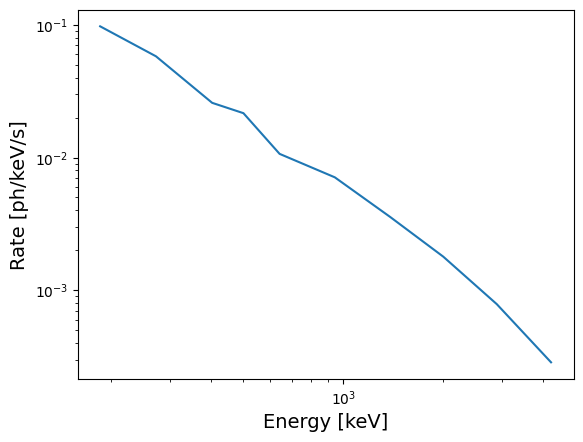

In [3]:
energy = bg[0] # keV
ewidth = bg[1] # keV
rate = bg[2] #ph/keV/s
plt.loglog(energy,rate)
plt.xlabel("Energy [keV]" , fontsize=14)
plt.ylabel("Rate [ph/keV/s]", fontsize=14)
plt.show()

Text(0.5, 0, 'Energy [keV]')

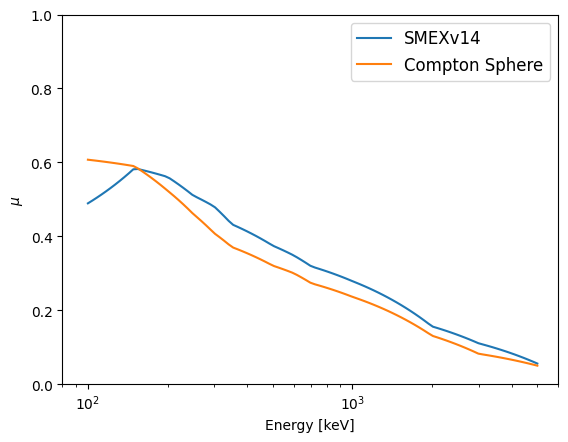

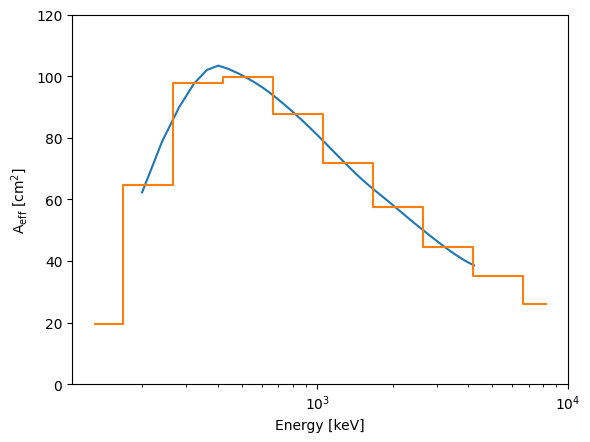

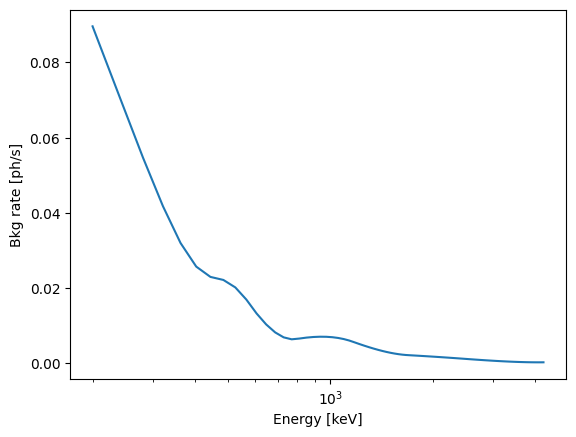

In [4]:
# drm = response.get_interp_response(SkyCoord(lon = 0*u.deg, lat = 90*u.deg, frame = SpacecraftFrame()))

# ax,plot = drm.get_effective_area().plot(label = "");

# ax.set_ylabel(f'Aeff [{drm.unit}]');

# ax.legend()

E_edges = np.array([100, 158.489, 251.189, 398.107, 630.957, 1000, 
                    1584.89, 2511.89, 3981.07, 6309.57, 10000])

# E_edges = np.logspace(1, 2, 10)
E_centers = (E_edges[1:]+E_edges[:-1])/2

Aeff = np.array([19.626306, 64.530083, 97.905992, 99.781624, 87.751976, 
                 71.752418, 57.475097, 44.387076, 35.098927, 26.132754])#cm2
aeff_spline = interp1d(E_centers, Aeff, kind='quadratic') 

E_ = np.array([100, 150, 200, 250, 300, 350, 500, 600, 700, 1000, 2000, 3000, 5000])
# E_ = np.array([100, 150, 200, 250, 300, 350, 500, 600, 700, 1000, 2000, 3000, 5000, 7000])
mu_smex = np.array([0.48912520581407065, 0.5841573677985159, 0.5605409993334326, 0.5103307534967093, 
                0.48060277739929363, 0.4324995323324857, 0.3745805744246736, 0.34809028026843103, 
                0.3182607714236058, 0.27853688097752366, 0.15606852822488163, 0.11037281802563134, 
                0.05569936911943423])

mu_sphere = np.array([0.6071768228417623, 0.589587053585568, 0.5233593843195103, 
                0.46048795283552607, 0.40846380764869183, 0.3708354279248211, 
                0.32053411946548005, 0.3000146731313562, 0.2726433287529707, 
                0.2361595683930214, 0.13095945611883575, 0.08209309664151235, 
                0.04993995194109498])

mu_smex_spline = interp1d(E_, mu_smex, kind='linear' ) 
mu_sphere_spline = interp1d(E_, mu_sphere, kind='linear') 

bkg_spline = interp1d(energy, rate, kind='quadratic') 


newEsample = np.logspace(np.log10(200), np.log10(4225.0), 100)
newEsample = np.linspace(200, 4225.0, 100)
newEsample2 = np.logspace(np.log10(100), np.log10(5000), 100)

plt.figure()
plt.plot(newEsample2, mu_smex_spline(newEsample2), '-', label='SMEXv14')
plt.plot(newEsample2, mu_sphere_spline(newEsample2), '-', label='Compton Sphere')
plt.ylim(0, 1)
plt.xlim(80, 6000)
plt.ylabel(r'$\mu$')
plt.xlabel('Energy [keV]')
plt.xscale('log')
plt.legend(fontsize=12)

plt.figure()
plt.plot(newEsample, aeff_spline(newEsample))
plt.step(E_centers, Aeff, where='mid')
plt.xscale('log')
plt.ylim(0, 120)
plt.ylabel(r'A$_{\rm eff}$ [cm$^2$]')
plt.xlabel('Energy [keV]')

plt.figure()
plt.plot(newEsample, bkg_spline(newEsample))
plt.xscale('log')
plt.ylabel(r'Bkg rate [ph/s]')
plt.xlabel('Energy [keV]')

In [23]:
Blim = 5 * u.degree 

    
dtype_dict = {
              'Swift_BAT_name': str, 
              'Type_BAT'      : str,
              'Fermi_LAT_name': str,
              'Type_LAT'      : str,
              'Sep_deg'       : float,
              'Flag'          : str,
              '1FLE'          : float,
              'BAT_ra'        : float,
              'BAT_dec'       : float,
              'index_BAT'     : float, 
              'index_LAT'     : float,
              'Flux_BAT'      : float,#1e-11 ergs/s/cm2
              'Flux_LAT'      : float,#1e-11 ergs/s/cm2
              'VarIndex'      : float}

df = pd.read_csv('../CATALOG/Tsuji_catalog_Table1.csv', sep=',', index_col=False, 
                 header=0, dtype=dtype_dict)

print(df)

             Swift_BAT_name   Type_BAT       Fermi_LAT_name Type_LAT  Sep_deg  \
0            [HB89]0537-441  BeamedAGN          PKS0537-441      BLL    0.063   
1            [HB89]0716+714  BeamedAGN            S50716+71      BLL    0.010   
2                    Mrk421  BeamedAGN               Mkn421      BLL    0.014   
3                    Mrk501  BeamedAGN               Mkn501      BLL    0.001   
4                     BLLac  BeamedAGN                BLLac      BLL    0.018   
..                      ...        ...                  ...      ...      ...   
151           PSRJ1420-6048     Pulsar        PSRJ1420-6048      PSR    0.272   
152           PSRJ1723-2837     Pulsar        PSRJ1723-2837      psr    0.361   
153             CGCG147-020        Sy2  (SWIFTJ0725.8+3000)      unk    0.282   
154  2MASXJ14080674-3023537      Sy1.9  (SWIFTJ1408.1-3024)      unk    0.150   
155            XTEJ1817-330       LMXB  (SWIFTJ1817.8-3301)      unk    0.144   

    Flag  1FLE  BAT_ra  BAT

In [6]:
def get_cosi_flux(e_array, ph_pl_norm, ph_pl_index):
    
    keV2erg = 1.60218e-9
    intrinsic_ph_spec = ph_pl_norm * e_array**(-ph_pl_index)
    intrinsic_e_spec = e_array * intrinsic_ph_spec
    tot_flux = intrinsic_ph_spec#np.trapz(intrinsic_ph_spec, x=e_array) #* keV2erg
    
    return tot_flux #erg/cm2/s
    
def get_flux_spectra(dataframe, dataframe2=None, swift_BAT_catalog=False, 
                     emin_=E_edges[:-1], emax_=E_edges[1:], label='xxx',show=True):

    """
    
    Parameters
    ----------
    dataframe : pandas dataframe
        the pandas dataframe of the csv file of the Tsuji catalog
    dataframe2 : pandas dataframe
            the pandas dataframe of the csv file of the Tsuji catalog
    group : str, optional
        DESCRIPTION. The default is 'Flag'; choice: [Type_LAT, Flag].

    Returns
    -------
    None.

    """
    erg2eV = 6.242e+11
    erg2keV = 6.242e+8
    GeV2erg = 0.00160218
    GeV2keV = 1000000
    keV2erg = 1.60218e-9
    MeV2erg = 1.60218e-6
    keV2MeV = 0.001
    
    emean_ = np.sqrt(emin_ * emax_)
    
    def PL_bat(x, a, b):
        #normalized at 1 keV
        E0=1 #keV
        return a * (x/E0)**(-b) 
    
    _name = dataframe['Swift_BAT_name']
    _ra, _dec = dataframe['BAT_ra'], dataframe['BAT_dec']
    _lat_type = dataframe['Type_LAT']
    print()

    src_coord = SkyCoord(ra=_ra, dec=_dec, frame='icrs', unit='deg')
    src_coord_gal = src_coord.galactic
    
    _ibat = dataframe['index_BAT']
    _fbat = dataframe['Flux_BAT']*1e-11 * erg2keV # keV/cm2/s 
    _kbat = ( _fbat * (2-_ibat))/((195)**(2-_ibat) - (14)**(2-_ibat))  
        
    print('Tot srcs:', len(_ibat))
    
    tot_cosi_flux_ = []
    tot_bat_flux_  = []
    tot_bat_index_ = []
    for s in range(0, len(_ibat)):
        if (abs(src_coord_gal[s].b.value) > Blim.value) and (_kbat[s] > 0) and \
            (_lat_type[s]=='BLL' or _lat_type[s]=='bll' or _lat_type[s]=='FSRQ' or _lat_type[s]=='fsrq' or _lat_type[s]=='bcu'):
            tot_cosi_flux = get_cosi_flux(newEsample, _kbat[s], _ibat[s])
            tot_cosi_flux_.append(tot_cosi_flux)
            tot_bat_flux_.append(dataframe['Flux_BAT'][s]*1e-11)
            tot_bat_index_.append(dataframe['index_BAT'][s])

            
    
    _tot_flux_ebins_ = [] 
    sel_src_names = 0
    for i, (emin, emax) in enumerate(zip(emin_, emax_)):
        print('E BIN:', emin, '-', emax, 'keV')
        e_ = np.linspace(emin, emax, 100)
        
        sel_src_names = []
        N_src_ROI = 0
        src_flux_bat, src_flux_lat = [], []
        for s in range(0, len(_ibat)):
            if (abs(src_coord_gal[s].b.value) > Blim.value) and (_kbat[s] > 0) and \
            (_lat_type[s]=='BLL' or _lat_type[s]=='bll' or _lat_type[s]=='FSRQ' or _lat_type[s]=='fsrq' or _lat_type[s]=='bcu'):
                
#                 print(_name[s], '\t\t', src_coord_gal[s].l.value, '\t\t', src_coord_gal[s].b.value)
                sel_src_names.append(_name[s])
                spec_bat = PL_bat(e_, _kbat[s], _ibat[s])  # ph/cm2/s/erg
                integ_bat = np.trapz(spec_bat, x=e_)
                src_flux_bat.append(integ_bat) 
                
                N_src_ROI = N_src_ROI+1
                
        _tot_flux_ebins_.append(src_flux_bat)
        
    _tot_flux_ebins_ = np.array(_tot_flux_ebins_).T
    
    print('N sources in ROI', N_src_ROI)
    
    return _tot_flux_ebins_, tot_cosi_flux_, np.array(tot_bat_flux_), np.array(tot_bat_index_), np.array(sel_src_names)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Bkg_rate_200_5000MeV 22.8267415809658 ph/s


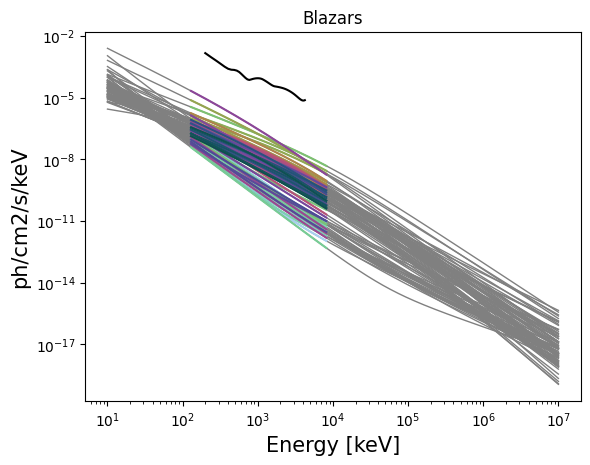

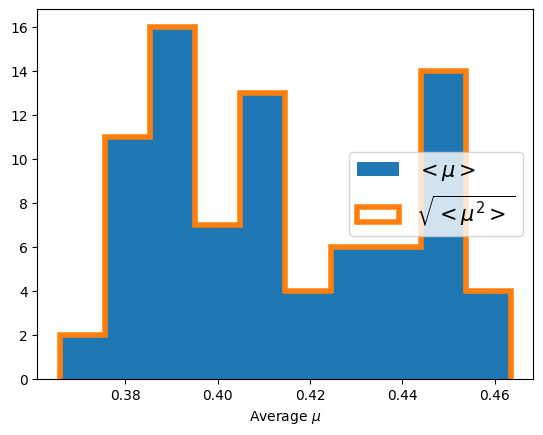

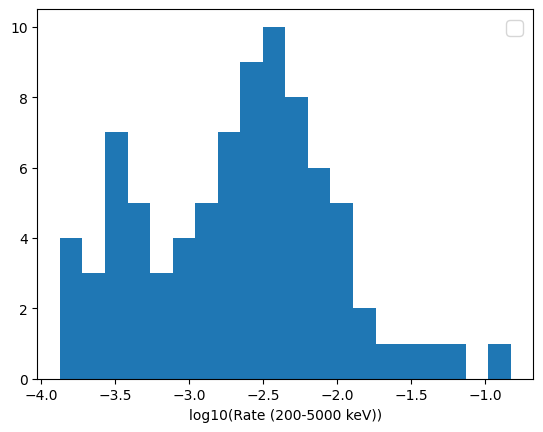

In [12]:
E_Lea = np.logspace(1, 7, 1000)

def bzq_spec(x_, norm, Eb, gamma1, gamma2):
    # SMPL
    return norm * 1/((x_/Eb)**gamma1 + (x_/Eb)**gamma2)

def bzb_spec(x_, norm, Eb, gamma1, gamma2):
    # SMPL_INV
    return ((x_/Eb)**gamma1 + (x_/Eb)**gamma2) * norm

Lea_full_blazar_sample = fits.open('../CATALOG/mik_full_bat_lat_fit_params_b_10.fits')[1]

Total_rate_200_5000_MeV = []
average_mus = []
average_mus2 = []
Lea_names_ = []
c = cx(np.linspace(0.2, 0.8, len(Lea_full_blazar_sample.data)))[::-1]
plt.figure()
plt.title('Blazars')
plt.plot(newEsample, bkg_spline(newEsample)/aeff_spline(newEsample) , color='k')
for i, s in enumerate(Lea_full_blazar_sample.data):
    if s['flag'] < 1 :
        Lea_names_.append(s['BAT_NAME'])
        if  s['function'] == 'smpl':
            spectrum = bzq_spec(E_centers, s['norm'], 10**s['log10(e_break)'], s['gamma1'], s['gamma2'])
            plt.plot(E_Lea, bzq_spec(E_Lea, s['norm'], 10**s['log10(e_break)'], s['gamma1'], s['gamma2']), color='0.5', linewidth=1)
        elif s['function'] == 'smpl_inv':
            spectrum = bzb_spec(E_centers, s['norm'], 10**s['log10(e_break)'], s['gamma1'], s['gamma2'])
            plt.plot(E_Lea, bzb_spec(E_Lea, s['norm'], 10**s['log10(e_break)'], s['gamma1'], s['gamma2']), color='0.5', linewidth=1)
        else:
            print('Not recognized function!')
            continue
        plt.plot(E_centers, spectrum, color=c[i])
        s_spline = interp1d(E_centers, spectrum,  kind='linear')
        s_folded = s_spline(newEsample) * aeff_spline(newEsample)   # ph/cm2/s/keV * cm2 = ph/s/keV
        tot_rate = np.trapz(s_spline(newEsample)*aeff_spline(newEsample), x=newEsample)   # ph/s/keV * keV = ph/s
        Total_rate_200_5000_MeV.append(tot_rate)
        average_mus.append(np.sum(mu_smex_spline(newEsample)*s_folded) / np.sum(s_folded))
        average_mus2.append((np.sum(mu_smex_spline(newEsample)*s_folded) / np.sum(s_folded))**2)
    else:
        continue
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]', size=15)
plt.ylabel('ph/cm2/s/keV', size=15)


Total_rate_200_5000_MeV = np.array(Total_rate_200_5000_MeV)
average_mus = np.array(average_mus)
average_mus2 = np.sqrt(np.array(average_mus2))
Lea_names_ = np.array(Lea_names_)


Bkg_rate_200_5000MeV = np.trapz(bkg_spline(newEsample), x=newEsample)
print('Bkg_rate_200_5000MeV', Bkg_rate_200_5000MeV, 'ph/s')

plt.figure()
plt.hist(average_mus, bins=10, label=r"$<\mu>$")
plt.hist(average_mus2, bins=10, histtype='step', linewidth=4, label=r"$\sqrt{<\mu^2>}$")
plt.xlabel('Average $\mu$')
plt.legend(fontsize=15)

plt.figure()
plt.hist(np.log10(Total_rate_200_5000_MeV), bins=20)
plt.xlabel('log10(Rate (200-5000 keV))')
plt.legend(fontsize=15)



# plt.figure()
# plt.hist(eflux_, bins=10)
# plt.xlabel('Flux 0.2$-$5 MeV [erg/cm2/s]')
# plt.show()

In [231]:
# _spectra_, eflux_, efluxBAT_, indexBAT_, names_ = get_flux_spectra(df, label='matched', show=False)
# _spectra_, cosi_ph_flux_, efluxBAT_, indexBAT_, names_ = get_flux_spectra(df, label='matched', show=False)


# plt.figure()
# for s_ in _spectra_:
#     plt.plot(E_centers, s_, 'o:')
# plt.ylabel(r'Photon flux [ph/cm$^2$/s]')
# plt.xlabel('Energy [keV]')
# plt.xscale('log')
# plt.yscale('log')

# plt.figure()
# Total_rate_200_5000_MeV = []
# average_mus = []
# average_mus2 = []
# for i, s_ in enumerate(_spectra_):
#     s_spline = interp1d(newEsample, cosi_ph_flux_[i],  kind='linear')
#     s_folded = s_spline(newEsample)*aeff_spline(newEsample)
#     plt.plot(newEsample, s_spline(newEsample)*aeff_spline(newEsample))
#     tot_rate = np.trapz(s_spline(newEsample), x=newEsample)
#     Total_rate_200_5000_MeV.append(tot_rate)
#     average_mus.append(np.sum(mu_smex_spline(newEsample)*s_folded) / np.sum(s_folded))
#     average_mus2.append(np.sqrt(np.sum(mu_smex_spline(newEsample)**2 * s_folded) / np.sum(s_folded)))
# plt.ylabel(r'Count rate [ph/s]')
# plt.xlabel('Energy [keV]')
# plt.xscale('log')
# plt.yscale('log')

# Total_rate_200_5000_MeV = np.array(Total_rate_200_5000_MeV)
# average_mus = np.array(average_mus)
# average_mus2 = np.array(average_mus2)

# Bkg_rate_200_5000MeV = np.trapz(bkg_spline(newEsample), x=newEsample)

# print('Bkg_rate_200_5000MeV', Bkg_rate_200_5000MeV, 'ph/s')

# plt.figure()
# plt.hist(average_mus, bins=10, label=r"$<\mu>$")
# plt.hist(average_mus2, bins=10, histtype='step', linewidth=4, label=r"$\sqrt{<\mu^2>}$")
# plt.xlabel('Average $\mu$')
# plt.legend(fontsize=15)

# plt.figure()
# plt.hist(eflux_, bins=10)
# plt.xlabel('Flux 0.2$-$5 MeV [erg/cm2/s]')
# plt.show()

In [13]:
# Compute MDP for all those sources as a function of Exposure time
def ComputeMDP99_2(average_mu, src_rate, bkg_rate, exposure):
    print('MDP99 2', )
    print('average_mu', average_mu[-1])
    print('src_rate', src_rate[-1])
    print('bkg_rate', bkg_rate)
    print('exposure', exposure)
    mdp99 = 4.29/average_mu/src_rate * np.sqrt((src_rate+bkg_rate)/exposure)
    print(mdp99[-1])
    return mdp99

def ComputeMDP99(average_mu, src_counts, bkg_counts):
    
    mdp99 = 4.29/average_mu * np.sqrt(src_counts+bkg_counts)/(src_counts)
    
    return mdp99

In [14]:
EXPOSURE = np.linspace(0.5*365*24*60*60, 9*365*24*60*60, 100)

iii_sort = np.argsort(Total_rate_200_5000_MeV)
names_sort = Lea_names_[iii_sort]
print(names_sort, Total_rate_200_5000_MeV[iii_sort])


# print(Bkg_rate_200_5000MeV, Total_rate_200_5000_MeV[iii_sort])

_MDPs_ = []

for exp in EXPOSURE:
    print('Calculation MDP for %i s observation...'%exp)
    # bkg_counts  = Bkg_rate_200_5000MeV * exp#np.sqrt(exp)
    # MDPs_ = []
    # src_counts = Total_rate_200_5000_MeV[iii_sort] * exp
    # print('cnts', bkg_counts, src_counts)
    mdp99 = ComputeMDP99_2(average_mus2[iii_sort], Total_rate_200_5000_MeV[iii_sort], Bkg_rate_200_5000MeV, exp)
    # print(mdp99)
    _MDPs_.append(mdp99)
    # print(mdp99)
    
_MDPs_ = np.array(_MDPs_)
_MDPs_T = _MDPs_.T

['[HB89]1415+259' '2MASXJ10311847+5053358' 'SHBLJ012308.7+342049'
 'PKS0548-322' 'FBQSJ1221+3010' 'RBS1895' '2MASSJ09303759+4950256'
 'RBS259' '2MASXJ07332681+5153560' '87GB050246.4+673341' 'PKS2005-489'
 '2MASXJ11033765-2329307' 'BZBJ0244-5819' 'PKS0352-686' '0133+388'
 '2MASXJ11363009+6737042' '2MASSJ09343014-1721215'
 '2MASXJ03252346-5635443' '1RXSJ225146.9-320614' 'H2356-309' '1ES1426+428'
 'QSOB0347-121' '2MASXJ07103005+5908202' 'QSOB0229+200' 'PKS2300-18'
 'QSOB1959+650' '3C309.1' '[HB89]1354+195' '87GB162418.8+435342'
 'PKS2008-159' '2MASXJ06230765-6436211' '7C1150+3324' 'PKS0524-460'
 '4C+33.06' '8C1849+670' 'PKS0607-549' '4C+49.22' '1RXSJ174036.3+521155'
 '[HB89]0403-132' 'PKS2145+06' '[HB89]1921-293' 'FBQSJ1159+2914'
 '[HB89]1803+784' 'PKS0637-752' 'QSOB0309+411' 'NGC1275' '[HB89]1039+811'
 'Mrk501' '3C380' 'PKS0402-362' 'B20920+39' 'PKS1127-14' '[HB89]0834-201'
 'PKS2052-47' 'PKS1329-049' 'PKS2331-240' 'Mrk421' 'RBS0315'
 '[HB89]2142-758' 'PKS2227-088' 'CGRaBSJ0805+6144' 'PK

/var/folders/c_/m9xq6z1d7ng4l884vymz4c240000gq/T/ipykernel_28443/1009629868.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap('inferno')


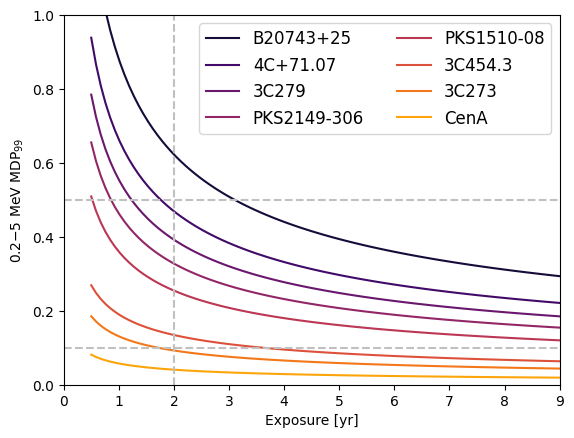

In [15]:

import matplotlib

num_best_blazars = 75

col = np.linspace(0.1, 0.8, len(names_sort[num_best_blazars:]))
cm = matplotlib.cm.get_cmap('inferno')

plt.figure()
for i, src in enumerate(names_sort[num_best_blazars:]):
    # if src == 'CenA':
    #     continue
    if src == '[HB89]0836+710':
        src = '4C+71.07'
    plt.plot(EXPOSURE/60/60/24/365, _MDPs_T[i+num_best_blazars], label=src, color=cm(col[i]))#, label='Exposure %.1f yrs'%(exp/12/30/24/60/60)
plt.vlines(2, 0, 1, linestyle='--', color='silver')
plt.hlines(0.5, 0, 9, linestyle='--', color='silver')
plt.hlines(0.1, 0, 9, linestyle='--', color='silver')

# plt.fill_betweenx([EXPOSURE[0]-1e7, EXPOSURE[-1]+1e7], 1, 1.5, alpha=0.2, color='0.5')
plt.ylabel('0.2$-$5 MeV MDP$_{99}$')
plt.xlabel('Exposure [yr]')
plt.ylim(0,1.0)
plt.xlim(0, 9)
# plt.ylim(EXPOSURE[0]-1e4, EXPOSURE[-1]+2e4)
plt.legend(loc=1, ncol=2, fontsize=12)

Exposure: 15768000 s
Number of sources with MDP99 <0.1: 1
	 ['[HB89]0537-441' 'Mrk421' 'Mrk501' 'SHBLJ012308.7+342049' '0133+388'
 'RBS259' 'QSOB0229+200' 'BZBJ0244-5819' 'QSOB0347-121' 'PKS0352-686'
 'PKS0548-322' '2MASXJ07103005+5908202' '2MASSJ09303759+4950256'
 '2MASSJ09343014-1721215' '2MASXJ10311847+5053358'
 '2MASXJ11033765-2329307' '2MASXJ11363009+6737042' 'FBQSJ1221+3010'
 '[HB89]1415+259' '1ES1426+428' '[HB89]1803+784' 'QSOB1959+650'
 'H2356-309' '3C454.3' 'PKS2227-088' '[HB89]2142-758' '3C345' 'PKS1622-29'
 'PKS1510-08' '3C279' '3C273' 'PG1222+216' '4C+49.22' '[HB89]0836+710'
 'PKS0528+134' 'PKS0402-362' 'PKS2325+093' 'PKS2149-306' '[HB89]1921-293'
 '[HB89]1354+195' 'PKS1329-049' '4C+04.42' 'FBQSJ1159+2914' '7C1150+3324'
 'PKS1127-14' '[HB89]1039+811' 'CGRaBSJ0805+6144' 'B20743+25'
 'PKS0637-752' '[HB89]0537-286' 'PKS0524-460' '[HB89]0403-132'
 '[HB89]0212+735' '4C+33.06' '2MASXJ07332681+5153560' 'PKS1936-623'
 'RBS1895' '1RXSJ225146.9-320614' 'PKS0521-36' 'CenA' '3C120' 'NG

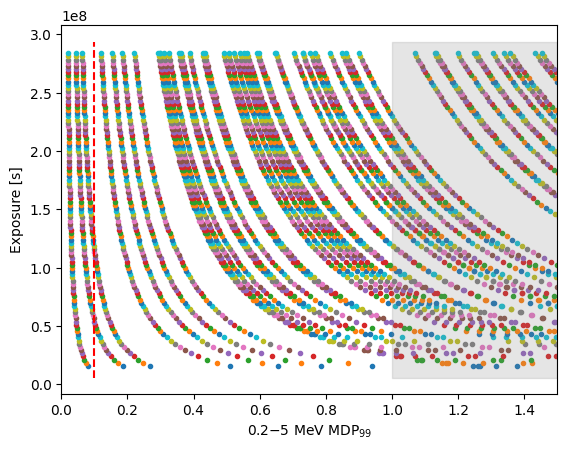

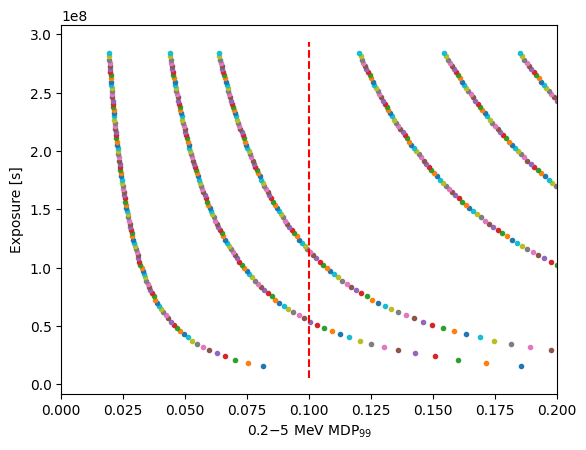

In [18]:
plt.figure()
for i, exp in enumerate(EXPOSURE):
    plt.scatter(_MDPs_[i], np.full(len(_MDPs_[i]), exp), marker='.', label='Exposure %.1f yrs'%(exp/12/30/24/60/60))
plt.vlines(0.1,  EXPOSURE[0]-1e7, EXPOSURE[-1]+1e7, linestyle='--', color='red')
plt.fill_betweenx([EXPOSURE[0]-1e7, EXPOSURE[-1]+1e7], 1, 1.5, alpha=0.2, color='0.5')
plt.xlabel('0.2$-$5 MeV MDP$_{99}$')
plt.ylabel('Exposure [s]')
plt.xlim(0,1.5)
# plt.ylim(EXPOSURE[0]-1e4, EXPOSURE[-1]+2e4)
# plt.legend(loc=1)

plt.figure()
for i, exp in enumerate(EXPOSURE):
    plt.scatter(_MDPs_[i], np.full(len(_MDPs_[i]), exp), marker='.', label='Exposure %.1f yrs'%(exp/12/30/24/60/60))
plt.vlines(0.1,  EXPOSURE[0]-1e7, EXPOSURE[-1]+1e7, linestyle='--', color='red')
plt.fill_betweenx([EXPOSURE[0]-1e7, EXPOSURE[-1]+1e7], 1, 1.5, alpha=0.2, color='0.5')
plt.xlabel('0.2$-$5 MeV MDP$_{99}$')
plt.ylabel('Exposure [s]')
plt.xlim(0,0.2)
# plt.ylim(EXPOSURE[0]-1e4, EXPOSURE[-1]+1e4)
# plt.legend(loc=1)


for i, exp in enumerate(EXPOSURE):
    print('Exposure: %i s'%exp)
    iii = np.where(_MDPs_[i]<0.1)
    print('Number of sources with MDP99 <0.1: %i'%(len(iii[0])))
    if len(iii) >1:
        for n in Lea_names_[iii]:
            print('\t', n)
    else:
        print('\t', Lea_names_)
    

In [20]:
def draw_selection_map(dataframe, swift_BAT_catalog=False, 
                       label='xxx',show=True):

    _name = dataframe['Swift_BAT_name']
    _ra, _dec = dataframe['BAT_ra'], dataframe['BAT_dec']
    _type = dataframe['Type_BAT']
    _lat_type = dataframe['Type_LAT']
    
    typelist = np.unique(_lat_type)
    print('Number of types in total:', len(typelist))
    c = cx(np.linspace(0.2, 0.8, len(typelist)))[::-1]


    src_coord = SkyCoord(ra=_ra, dec=_dec, frame='icrs', unit='deg')
    src_coord_gal = src_coord.galactic

    N_src_ROI = 0
    
    plt.figure(figsize=(12, 4))   
    
    L = src_coord_gal.l.value
    B = src_coord_gal.b.value
    L[L>180] = (L[L>180] - 360)
        
    plt.scatter(L, B, color='k', s=10)
    
    typesinreg = []
    for s in range(0, len(_name)):
        if (abs(src_coord_gal[s].b.value) > Blim.value) and _type[s]=='BeamedAGN':
#             (_lat_type[s]=='BLL' or _lat_type[s]=='bll' or _lat_type[s]=='FSRQ' \
#              or _lat_type[s]=='fsrq' or _lat_type[s]=='bcu'):
            N_src_ROI = N_src_ROI+1
            L = src_coord_gal[s].l.value
            if L > 180:
                L = L - 360
            typesinreg.append(_lat_type[s])
            iii = np.where(typelist == _lat_type[s])[0]
            plt.scatter(L, src_coord_gal[s].b, color=c[iii], s=20)
    
    typesinreg = np.array(typesinreg)
    for i, t in enumerate(np.unique(typesinreg)):
        iii = np.where(typelist == t)[0]
        plt.scatter(200, 100, color=c[iii], s=20, label='%s'%t)
        
    # plt.legend(loc=5, ncol=2, fontsize=10)
    plt.title('Sources in the ROI (%i)'%N_src_ROI)
    plt.xlabel('L')
    plt.ylabel('B')
    plt.xlim(-190, 190)
    plt.ylim(-100, 100)
    plt.savefig('map_%s.png'%label, dpi=200)
    
    
    plt.figure(figsize=(12, 6))
    plt.hist(typesinreg, color='w')
    for i, t in enumerate(np.unique(typesinreg)):
        print(t)
        iii = np.where(typelist == t)[0]
        print(iii)
        if len(iii) < 1:
            iii = np.random.uniform(low=0, high=1)
            idx = np.where(typesinreg == t)[0]
            plt.hist(typesinreg[idx], bins=1, histtype='stepfilled', color=cx(iii), label='%s'%t)
        else:
            idx = np.where(typesinreg == t)[0]
            plt.hist(typesinreg[idx], bins=1, histtype='stepfilled', color=c[iii], label='%s'%t)
    plt.ylabel('Num. of sources in ROI')
    plt.legend(loc=9, ncol=6, fontsize=9)
    plt.xticks(rotation=90)
    
    if show:
        plt.savefig('hist_%s.png'%label, dpi=200)
        
def draw_selection_pop(dataframe, dataframe2=None, swift_BAT_catalog=False, 
                       label='xxx',show=True):
    _name = dataframe['Swift_BAT_name']
    _ra, _dec = dataframe['BAT_ra'], dataframe['BAT_dec']
    _type = dataframe['Type_BAT']
    _index = dataframe['index_BAT']        
    _lat_type = dataframe['Type_LAT']

    if swift_BAT_catalog:
        _flux = dataframe['Flux_BAT']*1e-12
    else:
        _flux = dataframe['Flux_BAT']*1e-11
    
    typelist = np.unique(_lat_type)
    print('Number of types in total:', len(typelist))
    c = cx(np.linspace(0.2, 0.8, len(typelist)))[::-1]


    src_coord = SkyCoord(ra=_ra, dec=_dec, frame='icrs', unit='deg')
    src_coord_gal = src_coord.galactic

    N_src_ROI = 0
    
    plt.figure()   
        
    plt.scatter(_index, _flux, color='k', s=10)
    
    namesinreg = []
    typesinreg = []
    for s in range(0, len(_name)):
        if (abs(src_coord_gal[s].b.value) > Blim.value) and _type[s]=='BeamedAGN':
#             (_lat_type[s]=='BLL' or _lat_type[s]=='bll' or _lat_type[s]=='FSRQ' \
#              or _lat_type[s]=='fsrq' or _lat_type[s]=='bcu'):
            N_src_ROI = N_src_ROI+1
            typesinreg.append(_lat_type[s])
            namesinreg.append(_name[s])
            iii = np.where(typelist == _lat_type[s])[0]
            plt.scatter(_index[s], _flux[s], color=c[iii], s=20)
    print('Selected sources number:', len(namesinreg), 'Names:', namesinreg)
    typesinreg = np.array(typesinreg)
    for i, t in enumerate(np.unique(typesinreg)):
        iii = np.where(typelist == t)[0]
        plt.scatter(200, 100, color=c[iii], s=20, label='%s'%t)
        
    # plt.legend(loc=5, ncol=2, fontsize=10)
    plt.title('Sources in the ROI (%i)'%N_src_ROI)
    plt.xlabel('index')
    plt.ylabel('Flux [erg/cm$^2$/s]')
    plt.yscale('log')
    plt.xlim(0, 5)
    plt.ylim(1e-12, 1e-7)
    plt.savefig('pop_%s.png'%label, dpi=200)

Number of types in total: 24
AGN
[0]
BLL
[2]
FSRQ
[3]
RDG
[7]
agn
[8]
bcu
[9]
bll
[10]
css
[11]
fsrq
[12]
nlsy1
[16]
rdg
[19]
Number of types in total: 24
Selected sources number: 97 Names: ['[HB89]0537-441', '[HB89]0716+714', 'Mrk421', 'Mrk501', 'BLLac', 'SHBLJ012308.7+342049', '0133+388', 'RBS259', '2MASXJ02141794+5144520', 'QSOB0229+200', 'BZBJ0244-5819', 'QSOB0347-121', 'PKS0352-686', 'PKS0426-380', 'PKS0548-322', 'PMNJ0640-1253', '2MASXJ07103005+5908202', '2MASSJ09303759+4950256', '2MASSJ09343014-1721215', '2MASXJ10311847+5053358', '2MASXJ11033765-2329307', '2MASXJ11363009+6737042', 'FBQSJ1221+3010', '[HB89]1415+259', '1ES1426+428', '[HB89]1803+784', 'QSOB1959+650', '2MASXJ23470479+5142179', 'H2356-309', '3C454.3', '[HB89]2230+114', 'PKS2227-088', '[HB89]2142-758', 'PKS1830-21', '3C345', 'PKS1622-29', 'PKS1510-08', '3C279', '3C273', 'PG1222+216', '4C+49.22', '[HB89]0836+710', 'PKS0528+134', 'PKS0402-362', 'PKS2325+093', 'PKS2149-306', '[HB89]1921-293', '2MASSJ16561677-3302127', '[

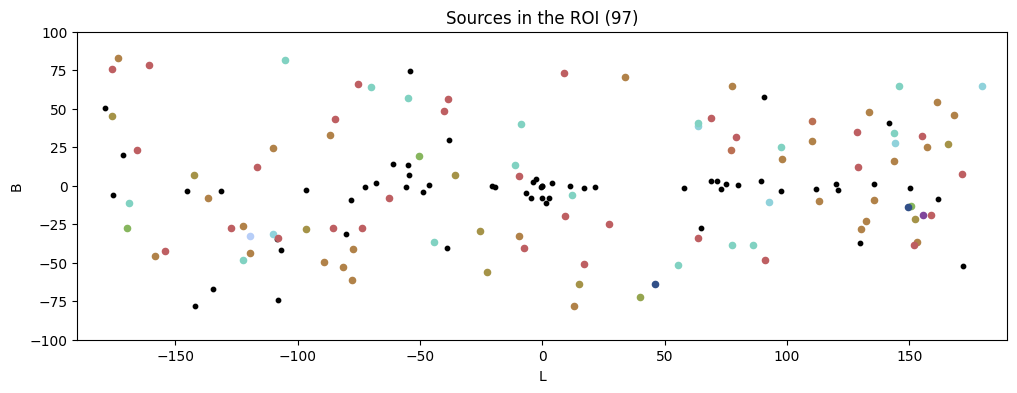

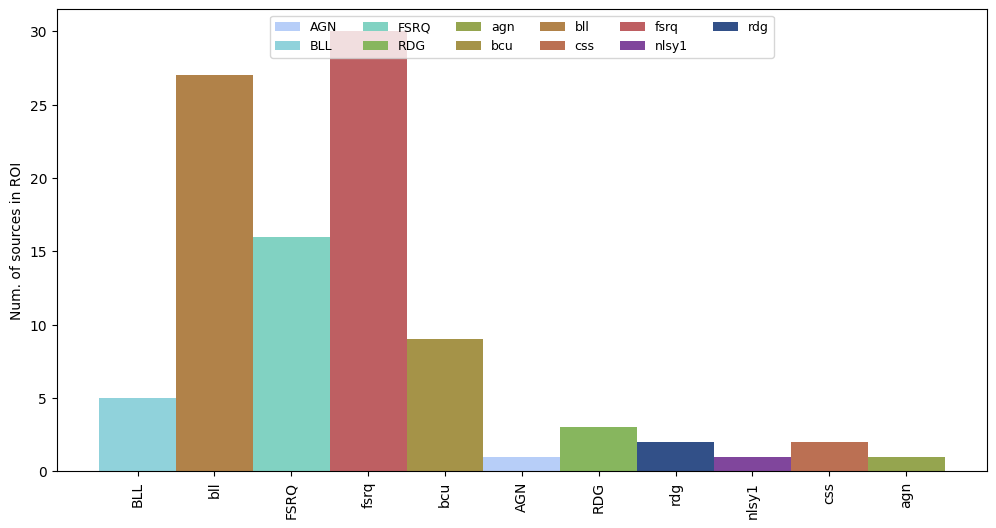

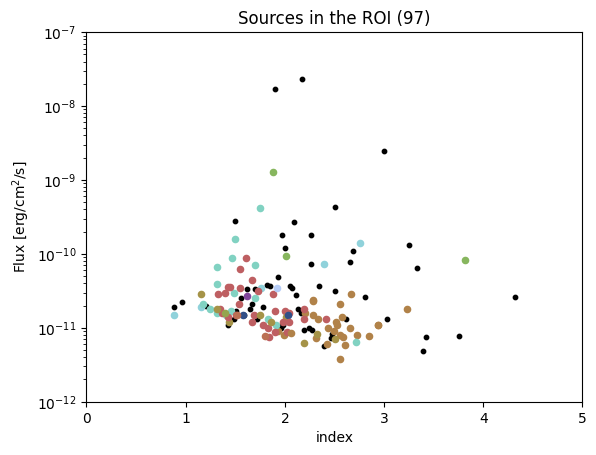

In [21]:
draw_selection_map(df, show=True, label='blazars')
draw_selection_pop(df, swift_BAT_catalog=False, label='blazars')